<a href="https://colab.research.google.com/github/anuragbisht12/Machine-Learning-Algorithms/blob/master/Salary_Prediction_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [2]:
from pycaret.regression import *
import pandas as pd

df= pd.read_csv('/content/sample_data/Salary.csv', index_col='id')

df.head()

,year,college,location,salary
id,,,,
1,0,1,bangalore,30
2,0,1,delhi,20
3,0,2,bangalore,3
4,0,2,delhi,3
5,0,3,bangalore,1


In [4]:
exp_reg = setup(df, target = 'salary')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8033
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(44, 4)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Passive Aggressive Regressor,10.801600,223.147400,13.445700,0.197600,0.520400,0.910700
1,CatBoost Regressor,12.479500,249.138600,14.389700,-0.078200,0.521200,1.637300
2,Random Forest,12.122600,296.425300,14.911800,-0.136300,0.493400,1.243400
3,Huber Regressor,12.486200,273.171300,15.144300,-0.276900,0.559200,1.536400
4,Ridge Regression,11.637500,219.532000,13.626000,-0.297400,0.447800,0.865400
5,Support Vector Machine,17.578200,685.124300,22.377600,-0.318700,0.664900,1.635100
6,Bayesian Ridge,12.178600,230.683300,14.381500,-0.449300,0.539800,1.352600
7,AdaBoost Regressor,12.710200,354.443500,15.614200,-0.497800,0.470400,1.253600
8,Lasso Regression,12.386100,263.791200,14.749900,-0.555200,0.438200,0.603800
9,Elastic Net,16.772600,515.528900,20.040700,-0.575200,0.629700,1.685300


In [6]:
par = create_model('par')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.2081,70.3245,8.3860,0.6945,0.2217,0.1941
1,11.6067,165.5696,12.8674,-0.5886,1.0497,0.5886
2,4.8917,32.4458,5.6961,0.8933,0.4361,0.2517
3,16.7573,538.8703,23.2136,0.6199,0.6021,0.3755
4,15.1808,311.3053,17.6438,0.5891,0.3377,0.2557
5,7.9665,82.5865,9.0877,-1.1237,0.2076,0.2207
6,19.0640,692.5435,26.3162,0.6042,0.4504,0.4294
7,7.7655,73.7385,8.5871,-0.9405,0.3680,0.3806
8,11.0817,175.5548,13.2497,0.7654,1.2851,6.1982
9,7.4941,88.5354,9.4093,0.4623,0.2459,0.2127


In [7]:
par_tuned = tune_model('par')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.1092,28.6042,5.3483,0.8758,0.1625,0.1574
1,14.3646,207.1540,14.3928,-0.9876,1.1814,0.6532
2,6.0241,46.4890,6.8183,0.8472,0.2920,0.2388
3,17.2724,427.3334,20.6720,0.6985,0.6971,0.4528
4,10.1524,188.2835,13.7216,0.7515,0.3503,0.1992
5,9.8194,159.5957,12.6331,-3.1039,0.2611,0.2604
6,14.9606,456.2885,21.3609,0.7392,0.3125,0.2836
7,13.0076,237.7540,15.4193,-5.2567,0.4590,0.5457
8,16.2977,431.5522,20.7738,0.4232,1.6488,12.0941
9,6.9430,61.3446,7.8323,0.6275,0.2503,0.2642


In [8]:
ensembled_par = ensemble_model(par_tuned)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.7615,86.8540,9.3195,0.6227,0.2181,0.2056
1,16.1813,272.3560,16.5032,-1.6132,0.8798,0.7641
2,5.9780,46.9787,6.8541,0.8456,0.8517,0.3541
3,16.8170,368.1062,19.1861,0.7403,1.5068,0.5186
4,13.6457,313.9094,17.7175,0.5856,0.5240,0.3250
5,12.1371,223.8193,14.9606,-4.7554,0.3044,0.3295
6,14.0677,381.6397,19.5356,0.7819,0.3171,0.2971
7,12.0628,206.0188,14.3534,-4.4215,0.4226,0.4925
8,14.4563,272.1809,16.4979,0.6362,1.4629,8.9715
9,10.5919,116.0321,10.7718,0.2954,0.3382,0.3898


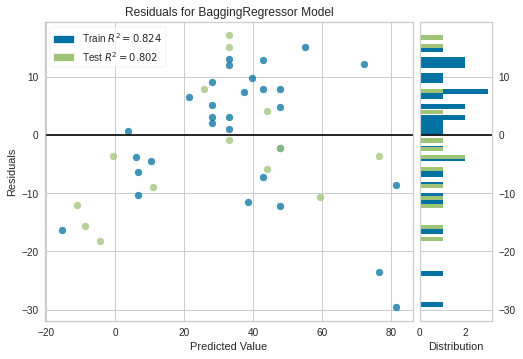

In [9]:
plot_model(ensembled_par)

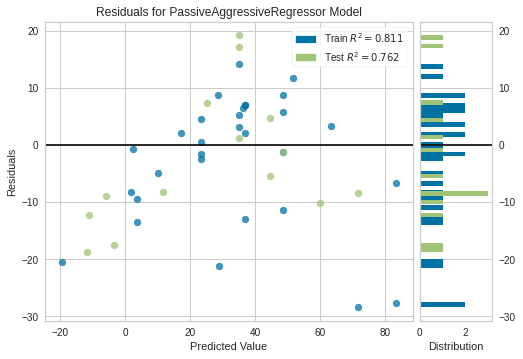

In [10]:
plot_model(par_tuned)

In [15]:
evaluate_model(ensembled_par)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [13]:
evaluate_model(par_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [17]:
save_model(ensembled_par,'model_1')

Transformation Pipeline and Model Succesfully Saved


In [18]:
load_model('model_1')

Transformation Pipeline and Model Sucessfully Loaded


[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='salary',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels_...
                 ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                 ('P_transform', Empty()), ('pt_target', Empty()),
                 ('binn', Empty()), ('rem_outliers', Empty()),
                 ('cluster_all', Empty()), ('dummy', Dummify(target='salary')),
                 ('

In [ ]:
# deploy_model(model = lr, model_name = 'model_1', platform = 'aws', authentication = {'bucket' : 'salaryprediction'})